# Venus vToken Deposits and Withdrawals
Account Behavior in Discrete Time Periods

In [61]:
import os
import pandas as pd
import dataframe_image as dfi
from dotenv import load_dotenv
from duneanalytics import DuneAnalytics
from matplotlib import ticker
from matplotlib import pyplot as plt

load_dotenv()
DUNE_UN = os.getenv('DUNE_UN')
DUNE_PW = os.getenv('DUNE_PW')

# initialize client
dune = DuneAnalytics(DUNE_UN, DUNE_PW)
dune.login()
dune.fetch_auth_token()

## vToken <> Collateral Token Transfer Count Comparison

In [ ]:
data = [
    ['vBTC', 'BTCB', 311563, 264254]
    ,['vETH', 'ETH', 261234, 242617]
    ,['vUSDT', 'USDT', 466711, 486978]
    ,['vBUSD', 'BUSD', 819487, 822882]
    ,['vDOT', 'DOT', 106084, 96013]
    ,['vUSDC', 'USDC', 290068, 291524]
]
df = pd.DataFrame(data, columns = ['vToken', 'Collateral Token', 'Deposit Count', 'Withdrawal Count'])
df.style

dfi.export(df, './assets/transfer-count.png')

## Full Year Net Deposit/Withdraw Distribution (A Top Asset)

In [55]:
%%capture output
# fetch query result id using query id & fetch query result
result_id = dune.query_result_id(query_id=326955)
data = dune.query_result(result_id)
result_data = data['data']['get_result_by_result_id']
frame_data = []
for d in result_data:
    frame_data.append(d['data'])

In [56]:
import pandas as pd
df = pd.DataFrame(frame_data, columns = data['data']['query_results'][0]['columns'])

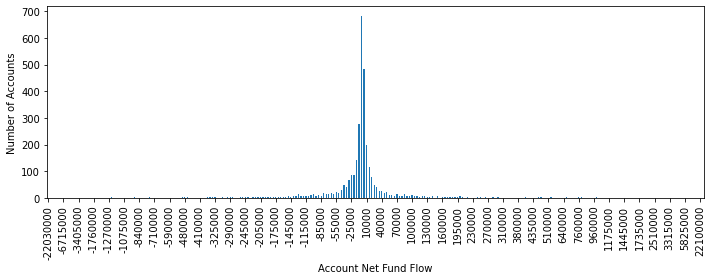

In [60]:
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.autolayout"] = True

all_data = []
for d in frame_data:
    if d['net'] is not None:
        net_rounded = round(d['net']/5000)*5000
        if net_rounded != 0:
            all_data.append(net_rounded)
all_data.sort()

if len(all_data) > 0:
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(1)

    df = pd.DataFrame({'numbers': all_data})
    df['numbers'].value_counts().sort_index().plot(ax=ax, kind='bar', xlabel='Account Net Fund Flow', ylabel='Number of Accounts')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    # ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    # plt.title(f"USDC Net Fund Flows in/out of vUSDC by Account")
    plt.show()
    fig.savefig('./assets/net-fundflow-accountdist-busd-H2-2021')

## Monthly (2021 Q4) Net Deposit / Withdraw Distribution (Top Assets)

In [48]:
%%capture output
# fetch query result id using query id & fetch query result
v_token = "vBTC"
dune_query = 326786
result_id = dune.query_result_id(query_id=dune_query)
data = dune.query_result(result_id)
result_data = data['data']['get_result_by_result_id']
frame_data = []
for d in result_data:
    frame_data.append(d['data'])

In [49]:
df = pd.DataFrame(frame_data, columns = data['data']['query_results'][0]['columns'])

In [50]:
df.query('withdraw > 0 and deposit <= 0')

,month,account,deposit,withdraw,net,net_abs
5303,11-21,\xa8c50e9f552886612109fe27cb94111a2f8006de,0.0,0.086873,0,0
8477,10-21,\xa8c50e9f552886612109fe27cb94111a2f8006de,0.0,0.018529,0,0


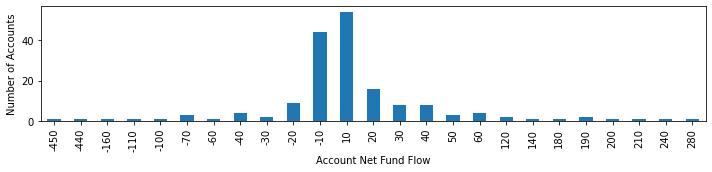

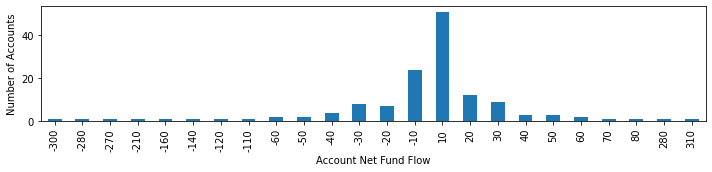

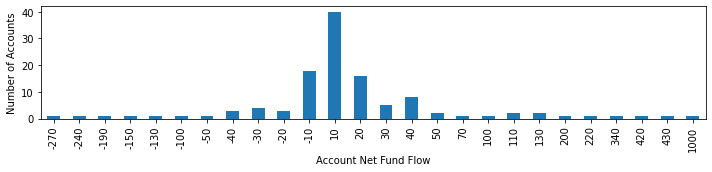

In [51]:
plt.rcParams["figure.figsize"] = [10, 2.5]
plt.rcParams["figure.autolayout"] = True

for m in range(1,13):
    month_data = []
    for d in frame_data:
        if d['month'] == f"{m:02d}-21" and d['net'] is not None:
            net_rounded = round(d['net']/10)*10
            if net_rounded != 0:
                month_data.append(net_rounded)
    month_data.sort()

    if len(month_data) > 0:
        fig, ax = plt.subplots()
        fig.patch.set_facecolor('white')
        fig.patch.set_alpha(1)

        df = pd.DataFrame({'numbers': month_data})
        df['numbers'].value_counts().sort_index().plot(ax=ax, kind='bar', xlabel='Account Net Fund Flow', ylabel='Number of Accounts')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        # ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        # ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        # plt.title(f"BTCB Net Fund Flows in/out of vBTC by Account {m:02d}-2021")
        plt.show()
        fig.savefig(f"./assets/net-fundflow-accountdist-{v_token}-{m:02d}-2021")

In [52]:
%%capture output
# fetch query result id using query id & fetch query result
v_token = "vETH"
dune_query = 326631
result_id = dune.query_result_id(query_id=dune_query)
data = dune.query_result(result_id)
result_data = data['data']['get_result_by_result_id']
frame_data = []
for d in result_data:
    frame_data.append(d['data'])

In [53]:
df = pd.DataFrame(frame_data, columns = data['data']['query_results'][0]['columns'])

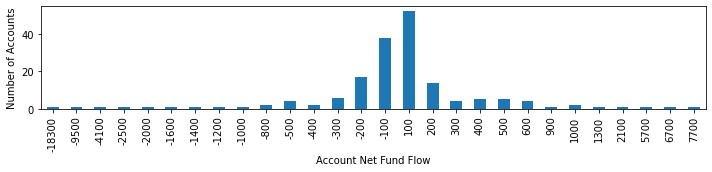

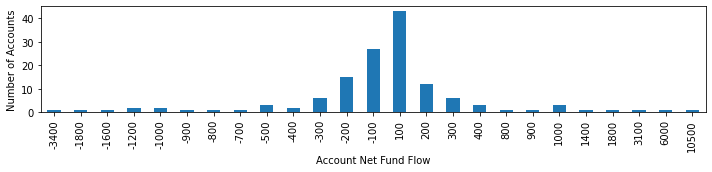

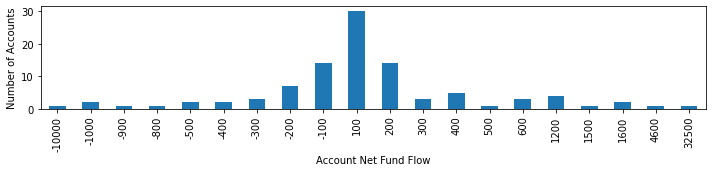

In [54]:
plt.rcParams["figure.figsize"] = [10, 2.5]
plt.rcParams["figure.autolayout"] = True

for m in range(1,13):
    month_data = []
    for d in frame_data:
        if d['month'] == f"{m:02d}-21" and d['net'] is not None:
            net_rounded = round(d['net']/100)*100
            if net_rounded != 0:
                month_data.append(net_rounded)
    month_data.sort()

    if len(month_data) > 0:
        fig, ax = plt.subplots()
        fig.patch.set_facecolor('white')
        fig.patch.set_alpha(1)

        df = pd.DataFrame({'numbers': month_data})
        df['numbers'].value_counts().sort_index().plot(ax=ax, kind='bar', xlabel='Account Net Fund Flow', ylabel='Number of Accounts')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        plt.show()
        fig.savefig(f"./assets/net-fundflow-accountdist-{v_token}-{m:02d}-2021")

In [62]:
%%capture output
# fetch query result id using query id & fetch query result
v_token = "vUSDT"
dune_query = 326728
result_id = dune.query_result_id(query_id=dune_query)
data = dune.query_result(result_id)
result_data = data['data']['get_result_by_result_id']
frame_data = []
for d in result_data:
    frame_data.append(d['data'])

In [63]:
df = pd.DataFrame(frame_data, columns = data['data']['query_results'][0]['columns'])

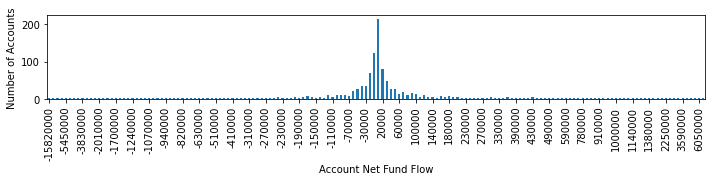

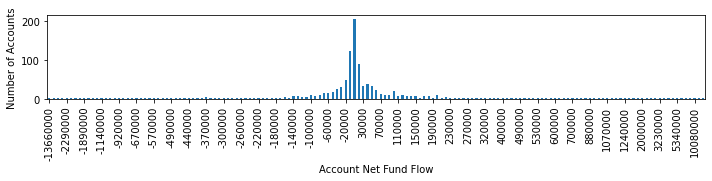

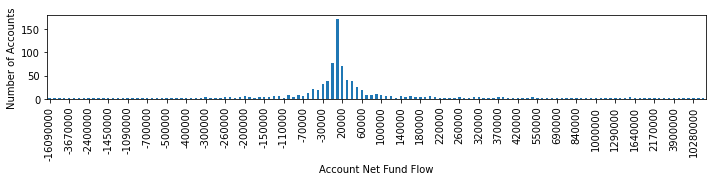

In [66]:
plt.rcParams["figure.figsize"] = [10, 2.5]
plt.rcParams["figure.autolayout"] = True

for m in range(1,13):
    month_data = []
    for d in frame_data:
        if d['month'] == f"{m:02d}-21" and d['net'] is not None:
            net_rounded = round(d['net']/10000)*10000
            if net_rounded != 0:
                month_data.append(net_rounded)
    month_data.sort()

    if len(month_data) > 0:
        fig, ax = plt.subplots()
        fig.patch.set_facecolor('white')
        fig.patch.set_alpha(1)

        df = pd.DataFrame({'numbers': month_data})
        df['numbers'].value_counts().sort_index().plot(ax=ax, kind='bar', xlabel='Account Net Fund Flow', ylabel='Number of Accounts')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
        plt.show()
        fig.savefig(f"./assets/net-fundflow-accountdist-{v_token}-{m:02d}-2021")

In [67]:
%%capture output
# fetch query result id using query id & fetch query result
v_token = "vBUSD"
dune_query = 326950
result_id = dune.query_result_id(query_id=dune_query)
data = dune.query_result(result_id)
result_data = data['data']['get_result_by_result_id']
frame_data = []
for d in result_data:
    frame_data.append(d['data'])

In [68]:
df = pd.DataFrame(frame_data, columns = data['data']['query_results'][0]['columns'])

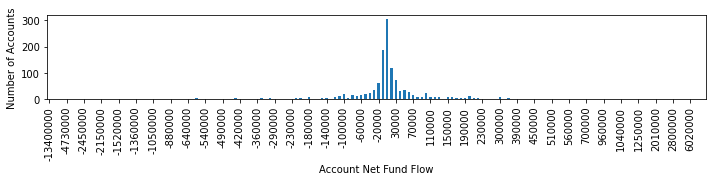

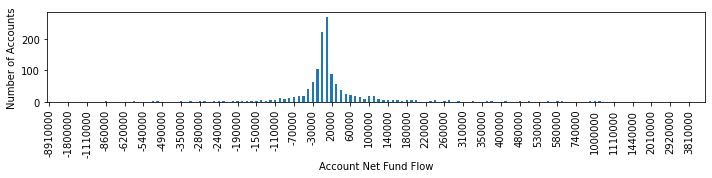

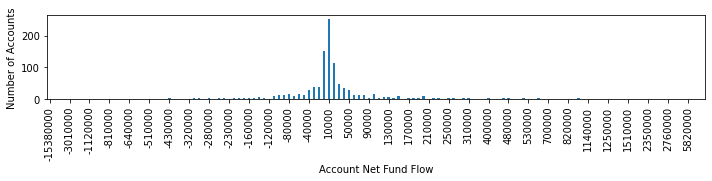

In [69]:
plt.rcParams["figure.figsize"] = [10, 2.5]
plt.rcParams["figure.autolayout"] = True

for m in range(1,13):
    month_data = []
    for d in frame_data:
        if d['month'] == f"{m:02d}-21" and d['net'] is not None:
            net_rounded = round(d['net']/10000)*10000
            if net_rounded != 0:
                month_data.append(net_rounded)
    month_data.sort()

    if len(month_data) > 0:
        fig, ax = plt.subplots()
        fig.patch.set_facecolor('white')
        fig.patch.set_alpha(1)

        df = pd.DataFrame({'numbers': month_data})
        df['numbers'].value_counts().sort_index().plot(ax=ax, kind='bar', xlabel='Account Net Fund Flow', ylabel='Number of Accounts')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
        plt.show()
        fig.savefig(f"./assets/net-fundflow-accountdist-{v_token}-{m:02d}-2021")

In [70]:
%%capture output
# fetch query result id using query id & fetch query result
v_token = "vDOT"
dune_query = 326954
result_id = dune.query_result_id(query_id=dune_query)
data = dune.query_result(result_id)
result_data = data['data']['get_result_by_result_id']
frame_data = []
for d in result_data:
    frame_data.append(d['data'])

In [71]:
df = pd.DataFrame(frame_data, columns = data['data']['query_results'][0]['columns'])

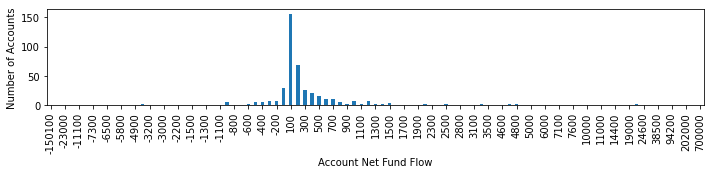

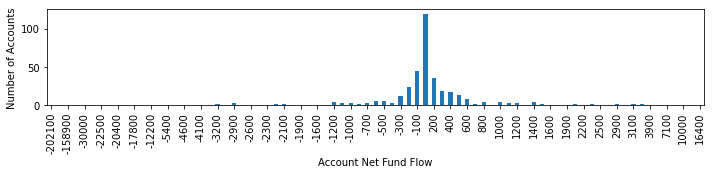

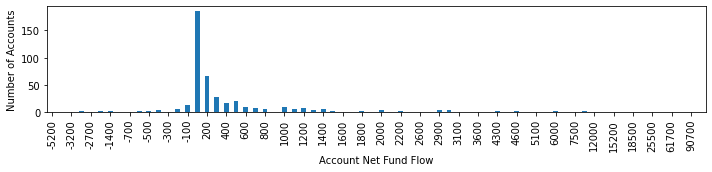

In [74]:
plt.rcParams["figure.figsize"] = [10, 2.5]
plt.rcParams["figure.autolayout"] = True

for m in range(1,13):
    month_data = []
    for d in frame_data:
        if d['month'] == f"{m:02d}-21" and d['net'] is not None:
            net_rounded = round(d['net']/100)*100
            if net_rounded != 0:
                month_data.append(net_rounded)
    month_data.sort()

    if len(month_data) > 0:
        fig, ax = plt.subplots()
        fig.patch.set_facecolor('white')
        fig.patch.set_alpha(1)

        df = pd.DataFrame({'numbers': month_data})
        df['numbers'].value_counts().sort_index().plot(ax=ax, kind='bar', xlabel='Account Net Fund Flow', ylabel='Number of Accounts')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
        plt.show()
        fig.savefig(f"./assets/net-fundflow-accountdist-{v_token}-{m:02d}-2021")

In [75]:
%%capture output
# fetch query result id using query id & fetch query result
v_token = "vUSDC"
dune_query = 323328
result_id = dune.query_result_id(query_id=dune_query)
data = dune.query_result(result_id)
result_data = data['data']['get_result_by_result_id']
frame_data = []
for d in result_data:
    frame_data.append(d['data'])

In [76]:
df = pd.DataFrame(frame_data, columns = data['data']['query_results'][0]['columns'])

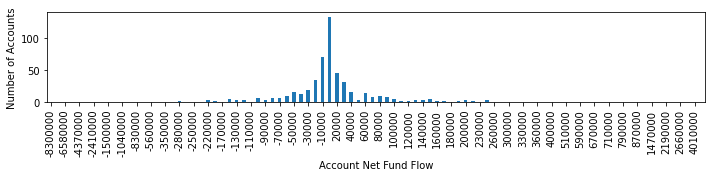

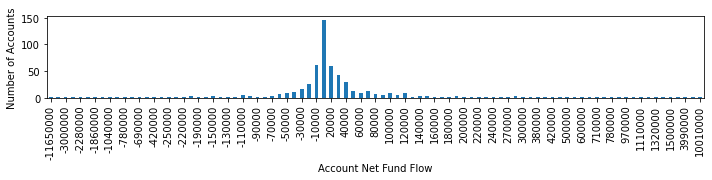

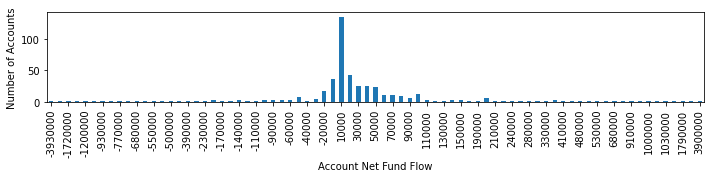

In [79]:
plt.rcParams["figure.figsize"] = [10, 2.5]
plt.rcParams["figure.autolayout"] = True

for m in range(1,13):
    month_data = []
    for d in frame_data:
        if d['month'] == f"{m:02d}-21" and d['net'] is not None:
            net_rounded = round(d['net']/10000)*10000
            if net_rounded != 0:
                month_data.append(net_rounded)
    month_data.sort()

    if len(month_data) > 0:
        fig, ax = plt.subplots()
        fig.patch.set_facecolor('white')
        fig.patch.set_alpha(1)

        df = pd.DataFrame({'numbers': month_data})
        df['numbers'].value_counts().sort_index().plot(ax=ax, kind='bar', xlabel='Account Net Fund Flow', ylabel='Number of Accounts')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
        plt.show()
        fig.savefig(f"./assets/net-fundflow-accountdist-{v_token}-{m:02d}-2021")